In [16]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from itertools import chain

In [2]:
df_happy = pd.read_csv("C:/Users/adama/Desktop/happiness_adam.csv")
df_happy.head()

,Country Code,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,FI,Finland,7.632,7.695,7.569,2.595,1.305,1.592,0.874,0.681,0.192,0.393
1,NO,Norway,7.594,7.657,7.530,2.383,1.456,1.582,0.861,0.686,0.286,0.340
2,DK,Denmark,7.555,7.623,7.487,2.370,1.351,1.590,0.868,0.683,0.284,0.408
3,IS,Iceland,7.495,7.593,7.398,2.426,1.343,1.644,0.914,0.677,0.353,0.138
4,CH,Switzerland,7.487,7.570,7.405,2.320,1.420,1.549,0.927,0.660,0.256,0.357


In [3]:
headers = ["code", "country", "score", "whisker_high", "whisker_low", "dystopia", "gdp", "social", "life_expectancy", "freedom", "generosity", "corruption"]
df_happy.columns = headers
df_happy

,code,country,score,whisker_high,whisker_low,dystopia,gdp,social,life_expectancy,freedom,generosity,corruption
0,FI,Finland,7.632,7.695,7.569,2.595,1.305,1.592,0.874,0.681,0.192,0.393
1,NO,Norway,7.594,7.657,7.530,2.383,1.456,1.582,0.861,0.686,0.286,0.340
2,DK,Denmark,7.555,7.623,7.487,2.370,1.351,1.590,0.868,0.683,0.284,0.408
3,IS,Iceland,7.495,7.593,7.398,2.426,1.343,1.644,0.914,0.677,0.353,0.138
4,CH,Switzerland,7.487,7.570,7.405,2.320,1.420,1.549,0.927,0.660,0.256,0.357
5,NL,Netherlands,7.441,7.498,7.384,2.448,1.361,1.488,0.878,0.638,0.333,0.295
6,CA,Canada,7.328,7.421,7.236,2.306,1.330,1.532,0.896,0.653,0.321,0.291
7,NZ,New Zealand,7.324,7.401,7.247,2.156,1.268,1.601,0.876,0.669,0.365,0.389
8,SE,Sweden,7.314,7.388,7.241,2.217,1.355,1.501,0.913,0.659,0.285,0.383
9,AU,Australia,7.272,7.358,7.186,2.139,1.340,1.573,0.910,0.647,0.361,0.302


In [7]:
country = df_happy["country"]
gdp = df_happy["gdp"]
social = df_happy["social"]
life_expectancy = df_happy["life_expectancy"]
freedom = df_happy["freedom"]
generosity = df_happy["generosity"]
corruption = df_happy["corruption"]
dystopia = df_happy["dystopia"]
whisker_high = df_happy["whisker_high"]
whisker_low = df_happy["whisker_low"]
yerr = whisker_high - whisker_low

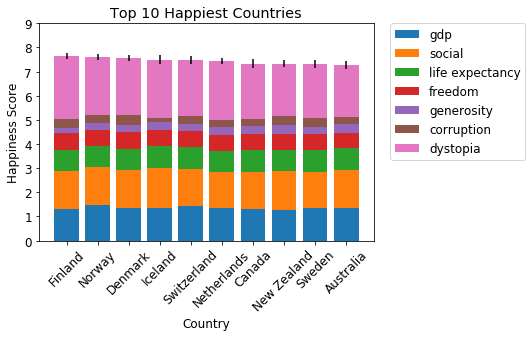

<Figure size 432x288 with 0 Axes>

In [43]:
ind = np.arange(df_happy["country"].nunique())    # the x locations for the groups
#print(ind)
#print(ind)
width = 10
#top_10 = [i for i in range(10)]
country_10 = [country[0], country[1],country[2],country[3],country[4],country[5],country[6],
             country[7],country[8],country[9]]
country_10 = pd.Series(country_10)
top_10 = [0,1,2,3,4,5,6,7,8,9]
top_10 = pd.Series(top_10)

country_10 = df_happy["country"].head(10)
gdp_10 = df_happy["gdp"].head(10)
social_10= df_happy["social"].head(10)
life_expectancy_10 = df_happy["life_expectancy"].head(10)
freedom_10 = df_happy["freedom"].head(10)
generosity_10 = df_happy["generosity"].head(10)
corruption_10 = df_happy["corruption"].head(10)
dystopia_10 = df_happy["dystopia"].head(10)
whisker_high_10 = df_happy["whisker_high"].head(10)
whisker_low_10 = df_happy["whisker_low"].head(10)
yerr_10 = yerr.head(10)

#a = list(chain.from_iterable(ind))
#print(a[:10])
#print(country_10)
#print(top_10)
#fig = plt.figure(figsize=(100, 50))

#ax = plt.subplots()

#fig = plt.figure(figsize=(100, 50))
#ax = fig.add_subplot(111)

p1 = plt.bar(top_10, gdp_10)
p2 = plt.bar(top_10, social_10, bottom=gdp_10)
p3 = plt.bar(top_10, life_expectancy_10, bottom=gdp_10+social_10)
p4 = plt.bar(top_10, freedom_10, bottom=gdp_10+social_10+life_expectancy_10)
p5 = plt.bar(top_10, generosity_10, bottom=gdp_10+social_10+life_expectancy_10+freedom_10)
p6 = plt.bar(top_10, corruption_10, bottom=gdp_10+social_10+life_expectancy_10+freedom_10+generosity_10)
p7 = plt.bar(top_10, dystopia_10, bottom=gdp_10+social_10+life_expectancy_10+freedom_10+generosity_10+corruption_10, yerr=yerr_10)

#ax = fig.add_subplot(111)
#ax.plot(x, y)
#plt.figure(figsize=(100, 50)

#ax.legend(bbox_to_anchor=(100, 1.05))
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')
plt.xticks(top_10, country_10, rotation=45)
plt.yticks(np.arange(0, 10, 1))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]),
          ('gdp', 'social', 'life expectancy', 'freedom', 'generosity', 'corruption', 'dystopia'),
           loc=2, borderaxespad=0, bbox_to_anchor=(1.05,1))
plt.rcParams.update({'font.size': 12})
#plt.show()
f = plt.figure()
f.savefig("top_10.pdf", bbox_inches='tight')
#fig.savefig("foo.pdf", bbox_inches='tight')


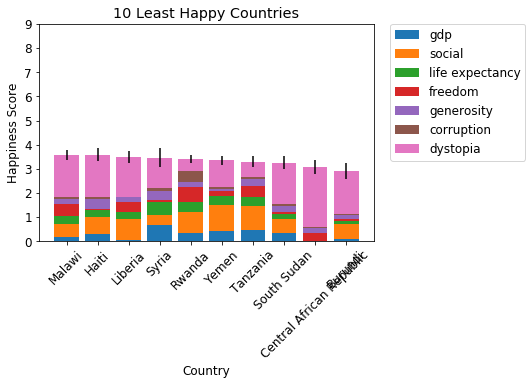

<Figure size 432x288 with 0 Axes>

In [50]:
width = 10
#top_10 = [i for i in range(10)]
#country_10 = [country[0], country[1],country[2],country[3],country[4],country[5],country[6],
#             country[7],country[8],country[9]]
#country_10 = pd.Series(country_10)
bottom_10 = [0,1,2,3,4,5,6,7,8,9]
bottom_10 = pd.Series(bottom_10)

country_10 = df_happy["country"].tail(10)
gdp_10 = df_happy["gdp"].tail(10)
social_10= df_happy["social"].tail(10)
life_expectancy_10 = df_happy["life_expectancy"].tail(10)
freedom_10 = df_happy["freedom"].tail(10)
generosity_10 = df_happy["generosity"].tail(10)
corruption_10 = df_happy["corruption"].tail(10)
dystopia_10 = df_happy["dystopia"].tail(10)
whisker_high_10 = df_happy["whisker_high"].tail(10)
whisker_low_10 = df_happy["whisker_low"].tail(10)
yerr_10 = yerr.tail(10)

#a = list(chain.from_iterable(ind))
#print(a[:10])
#print(country_10)
#print(top_10)
#fig = plt.figure(figsize=(100, 50))

#ax = plt.subplots()

#fig = plt.figure(figsize=(100, 50))
#ax = fig.add_subplot(111)

p1 = plt.bar(bottom_10, gdp_10)
p2 = plt.bar(bottom_10, social_10, bottom=gdp_10)
p3 = plt.bar(bottom_10, life_expectancy_10, bottom=gdp_10+social_10)
p4 = plt.bar(bottom_10, freedom_10, bottom=gdp_10+social_10+life_expectancy_10)
p5 = plt.bar(bottom_10, generosity_10, bottom=gdp_10+social_10+life_expectancy_10+freedom_10)
p6 = plt.bar(bottom_10, corruption_10, bottom=gdp_10+social_10+life_expectancy_10+freedom_10+generosity_10)
p7 = plt.bar(bottom_10, dystopia_10, bottom=gdp_10+social_10+life_expectancy_10+freedom_10+generosity_10+corruption_10, yerr=yerr_10)

#ax = fig.add_subplot(111)
#ax.plot(x, y)
#plt.figure(figsize=(100, 50)

#ax.legend(bbox_to_anchor=(100, 1.05))
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('10 Least Happy Countries')
plt.xticks(top_10, country_10, rotation=45)
plt.yticks(np.arange(0, 10, 1))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]),
          ('gdp', 'social', 'life expectancy', 'freedom', 'generosity', 'corruption', 'dystopia'),
           loc=2, borderaxespad=0, bbox_to_anchor=(1.05,1))
plt.rcParams.update({'font.size': 12})
#plt.show()
f = plt.figure()
f.savefig("bottom_10.pdf", bbox_inches='tight')
#fig.savefig("foo.pdf", bbox_inches='tight')